# WUST Machine Learning - Laboratory # 4

## **Linear Regression Model Selection and Hyperparameter Tuning Lab**  

- **Overview**  
In this lab, you will work with linear regression models to understand the impact of different regularization techniques and hyperparameter tuning.  
You'll use the california_housing dataset to predict house prices while learning how to prevent overfitting and optimize model performance.

- **Objectives**  
Understand the difference between simple linear regression and regularized versions (Ridge, Lasso, Elastic Net)  
Implement cross-validation techniques for linear regression  
Apply hyperparameter tuning to find optimal regularization parameters  
Evaluate model performance using appropriate regression metrics  
Visualize the impact of regularization on model coefficients  

In [18]:
# Required libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import ElasticNet, Lasso, LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score, learning_curve, train_test_split
from sklearn.preprocessing import StandardScaler

***Expected Deliverables*** 
- Completed implementation of all TODO sections  
- A report containing:  
 -- Data exploration visualizations  
 -- Cross-validation results for each model  
 -- Best hyperparameters found through Grid Search  
 -- Comparison of model performances  
 -- Visualization of coefficient values across different models  
 -- Analysis of how regularization affects model performance  
- Create learning curves to visualize model performance vs. training size  
- Implement feature selection based on Lasso coefficients  
- Implement your own custom cross-validation splitter  

### Tips  
- Pay attention to feature scaling - it's crucial for regularized models
- Experiment with different ranges of regularization parameters
- Look for features that become zero in Lasso regression
- Consider the trade-off between bias and variance
- Document your findings about which regularization technique works best and why

### Task 1: Data Preparation

In [19]:
# TODO: Load and preprocess the Boston Housing dataset
def load_and_preprocess_data():
    """
    Load the Boston Housing dataset and perform necessary preprocessing steps.

    Your code should:
    1. Load the dataset
    2. Scale the features using StandardScaler
    3. Split into training and testing sets (80-20 split)

    Returns:
    - X_train, X_test, y_train, y_test, df
    """
    data = fetch_california_housing(as_frame=True)
    df = data["frame"]
    X = df.drop(columns=["MedHouseVal"])
    y = df["MedHouseVal"]
    X[X.columns] = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=30)
    return X_train, X_test, y_train, y_test, df


def visualize_data(X_train, y_train):
    """
    Create scatter plots to visualize relationships between features and target.

    Your code should:
    1. Create scatter plots for each feature vs. house price
    2. Add trend lines
    3. Add proper labels and titles
    """

    feature_names = X_train.columns  # Recupero dei nomi delle colonne
    for feature in feature_names:
        plt.figure(figsize=(6, 4))
        plt.scatter(X_train[feature], y_train, alpha=0.5)
        plt.xlabel(feature)
        plt.ylabel("House Price")
        plt.title(f"{feature} vs. House Price")
        plt.show()

### Task 2: Implementing Different Linear Models

In [20]:
# TODO: Implement various linear regression models
def train_linear_models(X_train, y_train):
    """
    Train different types of linear regression models.

    Implement:
    1. Simple Linear Regression
    2. Ridge Regression (L2 regularization)
    3. Lasso Regression (L1 regularization)
    4. Elastic Net Regression

    Returns:
    - Dictionary containing trained models
    """
    models = {
        "linear": LinearRegression(),
        "ridge": Ridge(alpha=1.0),
        "lasso": Lasso(alpha=1.0),
        "elastic_net": ElasticNet(alpha=1.0, l1_ratio=0.5),
    }

    models["linear"] = LinearRegression().fit(X_train, y_train)
    models["ridge"] = Ridge(alpha=1.0).fit(X_train, y_train)
    models["lasso"] = Lasso(alpha=1.0).fit(X_train, y_train)
    models["elastic_net"] = ElasticNet(alpha=1.0, l1_ratio=0.5).fit(X_train, y_train)
    return models

### Task 3: Cross-Validation Implementation


In [21]:
# TODO: Implement k-fold cross-validation
def perform_cross_validation(model, X, y, k=5):
    """
    Perform k-fold cross-validation for regression models.

    Your code should:
    1. Implement k-fold cross-validation
    2. Calculate MSE and R² for each fold
    3. Return mean and std of performance metrics

    Parameters:
    - model: The regression model to evaluate
    - X: Feature matrix
    - y: Target vector
    - k: Number of folds

    Returns:
    - Dictionary with cross-validation metrics
    """

    mse_scores = cross_val_score(model, X, y, cv=k, scoring="neg_mean_squared_error")
    mse_scores = -mse_scores

    r2_scores = cross_val_score(model, X, y, cv=k, scoring="r2")

    return {
        "MSE Mean": mse_scores.mean(),
        "MSE Std": mse_scores.std(),
        "R² Mean": r2_scores.mean(),
        "R² Std": r2_scores.std(),
    }

### Task 4: Hyperparameter Tuning

In [22]:
# TODO: Implement Grid Search for different models
def tune_model_parameters(X_train, y_train):
    """
    Perform grid search for hyperparameter tuning.

    Your code should:
    1. Define parameter grids for each model type:
       - Ridge: different alpha values
       - Lasso: different alpha values
       - Elastic Net: different alpha and l1_ratio values
    2. Implement GridSearchCV
    3. Return best parameters and scores

    Returns:
    - Dictionary with best parameters for each model
    """
    param_grids = {
        "ridge": {"alpha": [0.001, 0.01, 0.1, 1, 10, 100]},
        "lasso": {"alpha": [0.001, 0.01, 0.1, 1, 10, 100]},
        "elastic_net": {"alpha": [0.001, 0.01, 0.1, 1, 10, 100], "l1_ratio": [0.1, 0.3, 0.5, 0.7, 0.9]},
    }

    models = {"ridge": Ridge(), "lasso": Lasso(), "elastic_net": ElasticNet()}

    best_params = {}
    for model_name, model in models.items():
        param_grid = param_grids[model_name]

        grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring="neg_mean_squared_error", cv=5)
        grid_search.fit(X_train, y_train)

        best_params[model_name] = {
            "best_params": grid_search.best_params_,
            "best_score": -grid_search.best_score_,  # MSE positive
        }
    return best_params

### Task 5: Model Evaluation and Visualization

In [23]:
# TODO: Implement comprehensive model evaluation
def evaluate_models(models, X_test, y_test):
    """
    Evaluate models using multiple metrics.

    Your code should calculate:
    1. Mean Squared Error (MSE)
    2. Root Mean Squared Error (RMSE)
    3. Mean Absolute Error (MAE)
    4. R² Score

    Returns:
    - Dictionary with evaluation metrics for each model
    """
    results = {}

    for name, model in models.items():
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        results[name] = {"MSE": mse, "RMSE": rmse, "MAE": mae, "R²": r2}

    return results


def visualize_coefficients(models, feature_names):
    """
    Create visualizations comparing model coefficients.

    Your code should:
    1. Create bar plots of coefficients for each model
    2. Compare how different regularization techniques affect coefficients
    3. Add proper labels and legends
    """

    for name, model in models.items():
        coefficients = model.coef_
        print(coefficients)

        plt.figure(figsize=(6, 4))
        plt.bar(range(len(feature_names)), coefficients, alpha=0.7, label=name)

        plt.xticks(range(len(feature_names)), feature_names, rotation=45)
        plt.xlabel("Feature")
        plt.ylabel("Coefficient Value")
        plt.title("Comparison of Model Coefficients")
        plt.legend()
        plt.tight_layout()
        plt.show()

### USAGE

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.54000

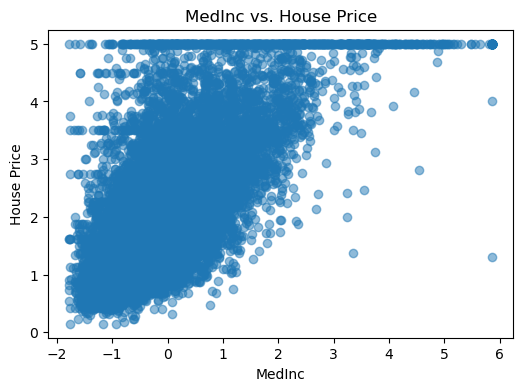

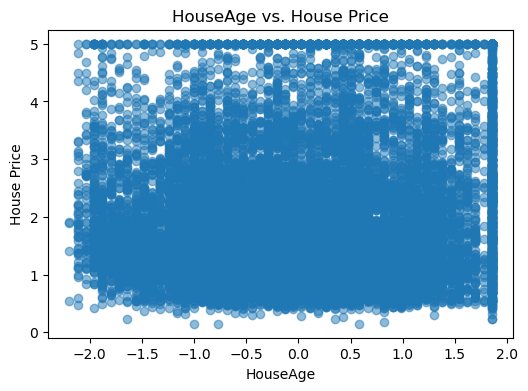

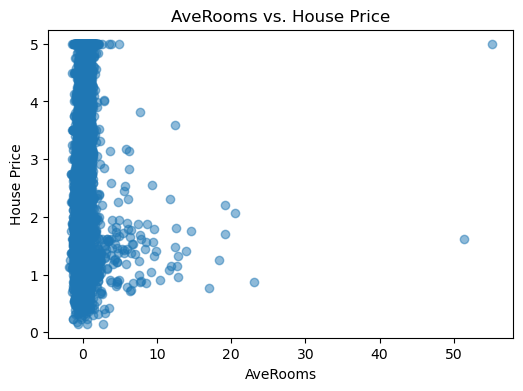

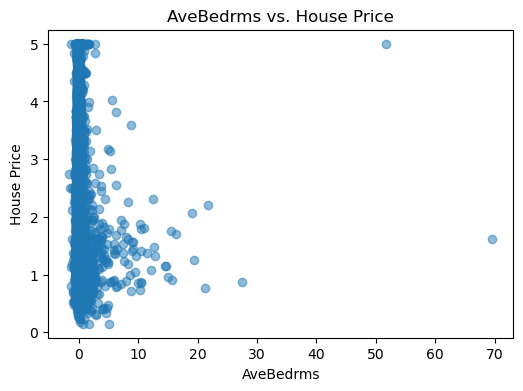

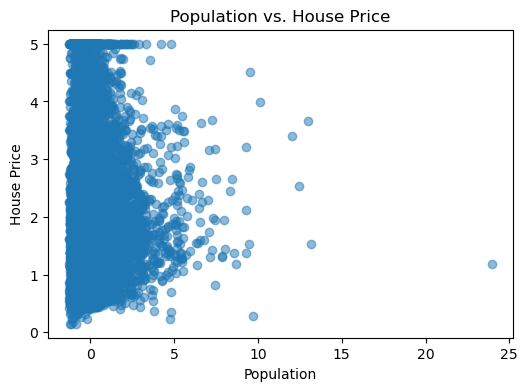

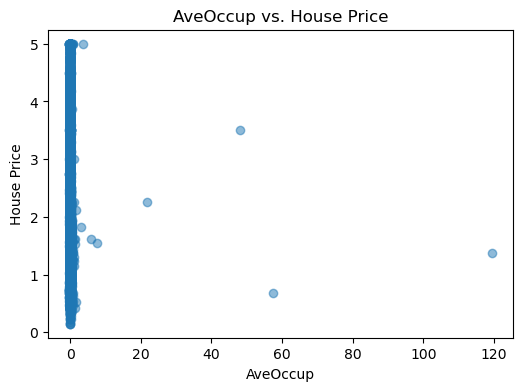

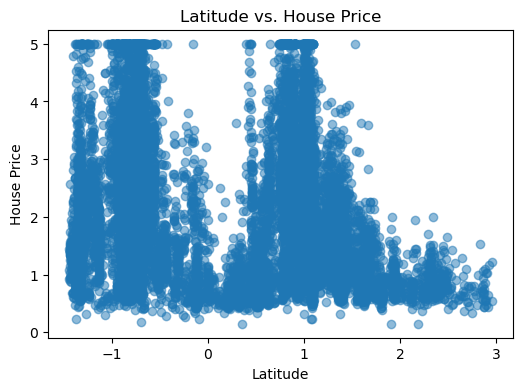

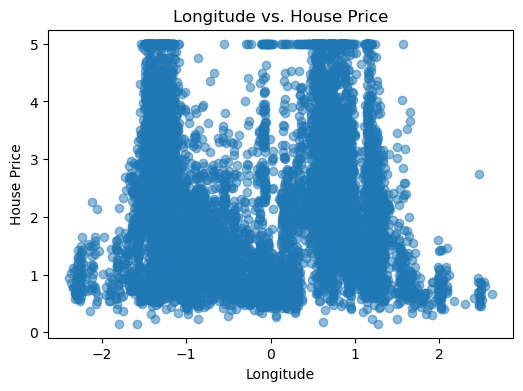

{'linear': LinearRegression(), 'ridge': Ridge(), 'lasso': Lasso(), 'elastic_net': ElasticNet()}


In [24]:
# Main execution flow
# Load and preprocess data
X_train, X_test, y_train, y_test, df = load_and_preprocess_data()

# Visualize relationships in data
print(df.describe())
visualize_data(X_train, y_train)

# Train models
models = train_linear_models(X_train, y_train)
print(models)

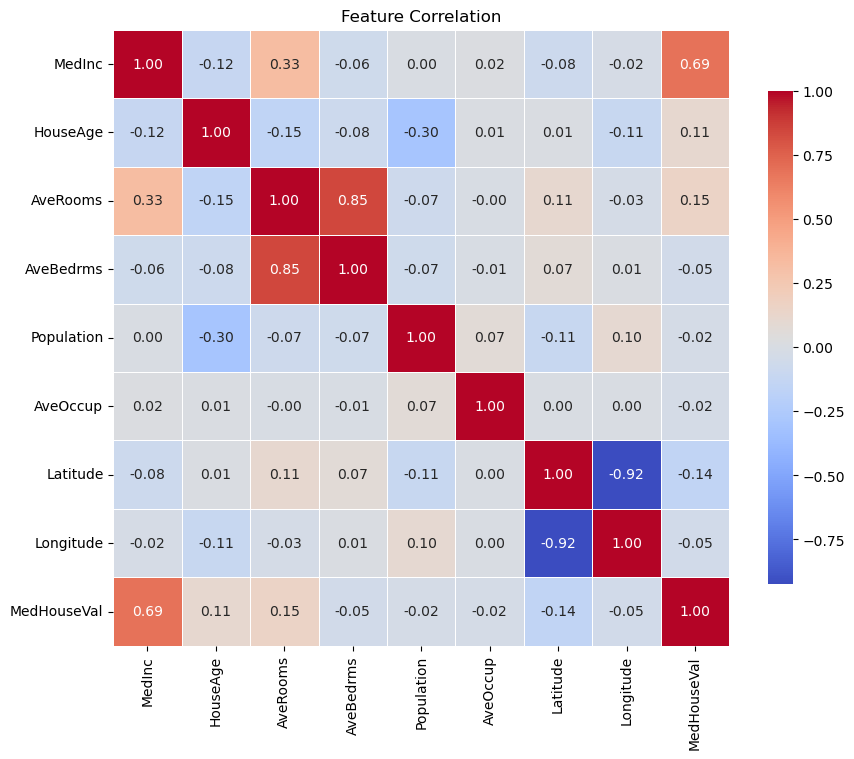

In [25]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(
    correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True, linewidths=0.5, cbar_kws={"shrink": 0.8}
)
plt.title("Feature Correlation")
plt.show()

In [26]:
# Perform cross-validation
cv_results = {}
for name, model in models.items():
    cv_results[name] = perform_cross_validation(model, X_train, y_train)
for model_name, scores in cv_results.items():
    print(model_name, scores)

linear {'MSE Mean': 0.5196737757360076, 'MSE Std': 0.009027622346363813, 'R² Mean': 0.6055927436829142, 'R² Std': 0.012005001486319786}
ridge {'MSE Mean': 0.519662581497113, 'MSE Std': 0.009014648794329939, 'R² Mean': 0.6056015978120308, 'R² Std': 0.011987476461566546}
lasso {'MSE Mean': 1.319883964002968, 'MSE Std': 0.04613849330093298, 'R² Mean': -0.0007978221637721994, 'R² Std': 0.0011036812277582177}
elastic_net {'MSE Mean': 1.0423289531704434, 'MSE Std': 0.040226521928952916, 'R² Mean': 0.2097572998782497, 'R² Std': 0.003095897217520414}


In [27]:
# Tune hyperparameters
best_params = tune_model_parameters(X_train, y_train)
for model_name, params in best_params.items():
    print(model_name, params)

ridge {'best_params': {'alpha': 10}, 'best_score': 0.5195753294851582}
lasso {'best_params': {'alpha': 0.001}, 'best_score': 0.5193502701244661}
elastic_net {'best_params': {'alpha': 0.001, 'l1_ratio': 0.9}, 'best_score': 0.5193689296810142}


ridge {'MSE': 0.5680820110120225, 'RMSE': 0.7537121539500491, 'MAE': 0.5465637797615277, 'R²': 0.5880918560197967}
lasso {'MSE': 0.568213002913599, 'RMSE': 0.7537990467714847, 'MAE': 0.546728174524966, 'R²': 0.5879968756648324}
elastic_net {'MSE': 0.5682122925735822, 'RMSE': 0.7537985755980057, 'MAE': 0.5467132396648929, 'R²': 0.5879973907222225}
[ 0.82656311  0.12205437 -0.27250955  0.3078074  -0.00536824 -0.03547114
 -0.87369028 -0.84350807]


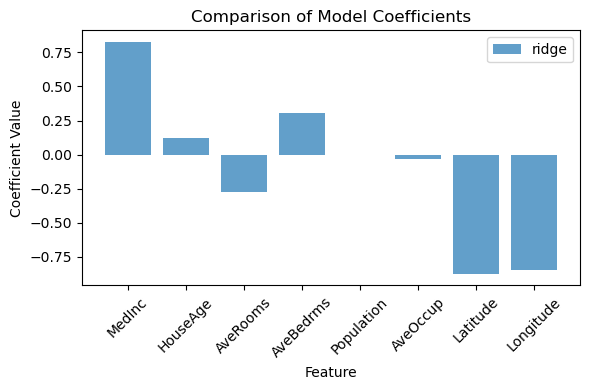

[ 0.82185966  0.12221968 -0.26062863  0.29641411 -0.00426207 -0.03469403
 -0.87030472 -0.83957445]


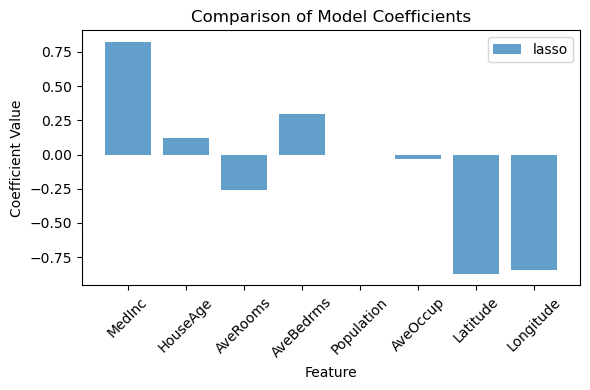

[ 0.82231687  0.12225533 -0.26173158  0.29743444 -0.0043537  -0.03477493
 -0.87014694 -0.83946824]


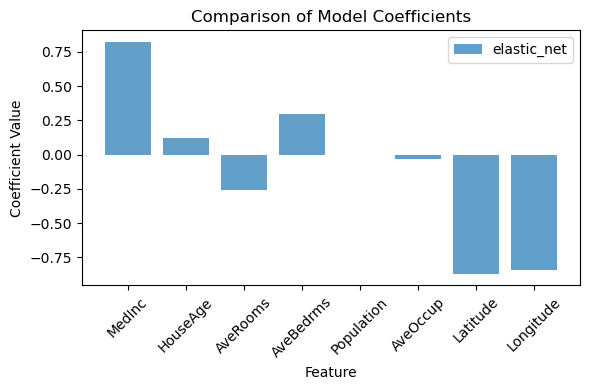

In [33]:
# Train final models with best parameters
final_models = {
    "ridge": Ridge(**best_params["ridge"]["best_params"]).fit(X_train, y_train),
    "lasso": Lasso(**best_params["lasso"]["best_params"]).fit(X_train, y_train),
    "elastic_net": ElasticNet(**best_params["elastic_net"]["best_params"]).fit(X_train, y_train),
}

# Evaluate and visualize results
final_metrics = evaluate_models(final_models, X_test, y_test)
for model_name, params in final_metrics.items():
    print(model_name, params)
visualize_coefficients(final_models, X_test.columns)

### TASK: feature selection based on Lasso coefficients

In [29]:
def select_features_with_lasso(model, X):
    """
    Select features with non-zero coefficients in Lasso.
    Parameters:
    - model: Trained Lasso model
    - X: Original feature matrix

    Returns:
    - Selected features with non-zero coefficients
    """
    non_zero_features = X.columns[(model.coef_ < -0.01) | (model.coef_ > 0.01)]
    return non_zero_features


selected_features = select_features_with_lasso(final_models["lasso"], X_train)
print("Selected features with Lasso:", selected_features)

Selected features with Lasso: Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'AveOccup', 'Latitude',
       'Longitude'],
      dtype='object')


### TASK: Create learning curves to visualize model performance vs. training size 

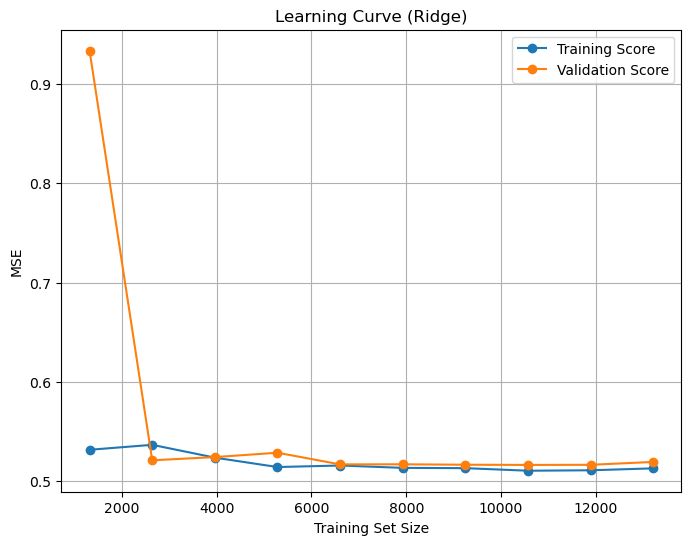

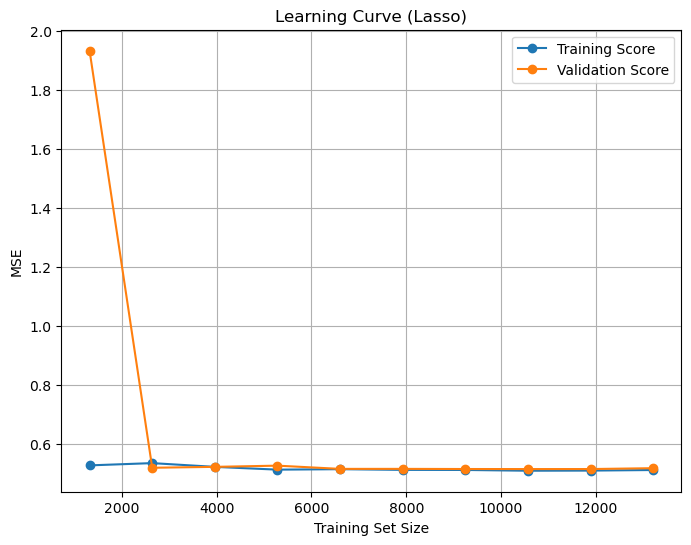

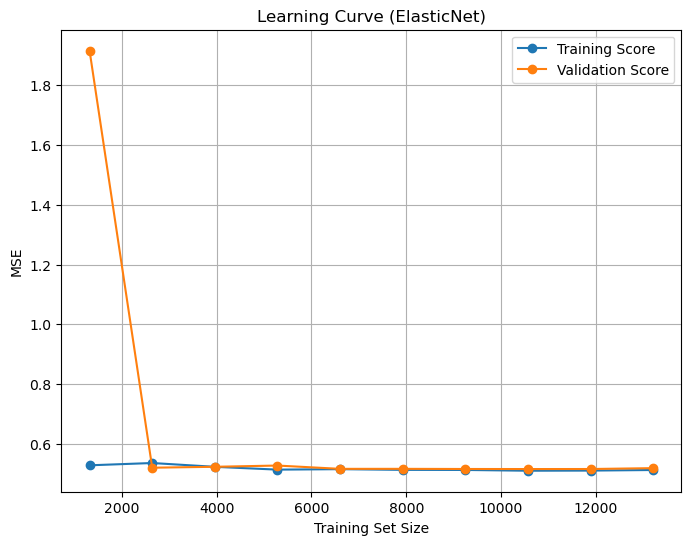

In [30]:
def plot_learning_curve(model, X, y, scoring="neg_mean_squared_error"):
    """
    Plots the learning curve for a given model.

    Parameters:
    - model: The regression model to evaluate
    - X: Feature matrix
    - y: Target vector
    - scoring: The metric to evaluate the model's performance ("neg_mean_squared_error" or "r2")
    """
    train_sizes, train_scores, val_scores = learning_curve(
        model, X, y, cv=5, scoring=scoring, train_sizes=np.linspace(0.1, 1.0, 10)
    )

    train_scores_mean = (
        -train_scores.mean(axis=1) if scoring == "neg_mean_squared_error" else train_scores.mean(axis=1)
    )
    val_scores_mean = -val_scores.mean(axis=1) if scoring == "neg_mean_squared_error" else val_scores.mean(axis=1)

    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_scores_mean, label="Training Score", marker="o")
    plt.plot(train_sizes, val_scores_mean, label="Validation Score", marker="o")
    plt.xlabel("Training Set Size")
    plt.ylabel("MSE" if scoring == "neg_mean_squared_error" else "R² Score")
    plt.title(f"Learning Curve ({model.__class__.__name__})")
    plt.legend()
    plt.grid()
    plt.show()


for _, model in final_models.items():
    plot_learning_curve(model, X_train, y_train, scoring="neg_mean_squared_error")

### TASK: Implement your own custom cross-validation splitter

In [31]:
class CustomKFoldSplitter:
    def __init__(self, n_splits=5, shuffle=True, random_state=None):
        self.n_splits = n_splits
        self.shuffle = shuffle
        self.random_state = random_state

    def split(self, X, y=None, groups=None):
        kf = KFold(n_splits=self.n_splits, shuffle=self.shuffle, random_state=self.random_state)
        return kf.split(X, y)

    def get_n_splits(self, X=None, y=None, groups=None):
        return self.n_splits

In [32]:
custom_splitter = CustomKFoldSplitter(n_splits=5, shuffle=True, random_state=42)

cv_results = {}
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=custom_splitter, scoring="neg_mean_squared_error")
    cv_results[name] = {"MSE Mean": -cv_scores.mean(), "MSE Std": cv_scores.std()}
for model_name, scores in cv_results.items():
    print(model_name, scores)

linear {'MSE Mean': 0.5185092997086926, 'MSE Std': 0.016781232325290052}
ridge {'MSE Mean': 0.5185003799726197, 'MSE Std': 0.01676234069024835}
lasso {'MSE Mean': 1.3195757549315459, 'MSE Std': 0.012666933797073588}
elastic_net {'MSE Mean': 1.0419544579714386, 'MSE Std': 0.010802368128375765}


## Final Considerations

### Model Performance
- Ridge Regression performs best overall, achieving an R² of 0.588 and an RMSE of 0.753 on the test set, indicating good generalization.

### Best Hyperparameters (from Grid Search)
- Ridge: Best alpha = 10, which provides stability and slightly better performance.
- Lasso: Best alpha = 0.001, indicating that a lower regularization level works best for this dataset.
- Elastic Net: Best alpha = 0.001, l1_ratio = 0.9, leaning towards Lasso's behavior to encourage sparsity.

Since all models yield similar coefficients, regularization has minimal impact on feature selection here. Ridge remains the preferred choice due to its stability and consistent performance, making it the most reliable model for this dataset.  

The most influential feature across all models is MedInc (median income), which has a strong positive coefficient, suggesting a direct relationship with house prices. Latitude and Longitude also show significant, but negative, coefficients, indicating that geographic location impacts pricing inversely in certain areas. Other features like HouseAge and AveRooms contribute to the model but with smaller effects, highlighting MedInc as the primary driver in predicting house prices.